#### Part 1: Minimum-Tracking-Error Frontier<br/>

#### Let the market return be the target return. Estimate the expected deviation from market return, for the ten industry portfolios:<br/>
#### Also estimate the covariance matrix of return deviations, for the ten industry portfolios:

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import pandas as pd
from numpy.linalg import inv,pinv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lns
from IPython.display import display, HTML


In [14]:
df1= pd.read_excel ('Industry_Portfolios.xlsx')
df2= pd.read_excel ('Market_Portfolio.xlsx')
Return=df1.set_index('Date')
Market=df2.set_index('Date')
Deviation=Return.sub(Market['Market'], axis=0)

In [15]:
Deviation

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-2.16,-3.29,-2.84,-1.78,2.31,-0.81,-1.77,0.87,-0.30,0.66
200402,2.79,-1.53,0.49,3.23,-4.38,-1.98,4.63,-0.57,0.61,0.70
200403,1.14,0.08,0.96,1.10,-1.32,-0.84,1.52,-2.73,2.36,0.60
200404,3.17,4.05,1.58,4.27,-3.16,1.27,-0.95,5.29,-1.80,-2.01
200405,-3.12,-2.87,0.38,-0.84,3.62,-4.18,-0.93,-1.65,0.05,0.63
...,...,...,...,...,...,...,...,...,...,...
201308,-1.31,1.69,0.74,0.86,2.57,-0.59,-1.52,-0.80,-1.74,-0.97
201309,-1.82,2.70,1.44,-1.73,0.01,0.57,0.70,0.43,-2.71,0.07
201310,0.58,-3.45,0.39,0.69,-0.37,1.35,0.91,-0.70,-0.82,-0.30


In [16]:
Expected_Deviation = pd.DataFrame({'Expected Deviation':Deviation.mean()})
cov = Deviation.cov()
R = np.matrix(Deviation.mean())
R = np.matrix(R.T)
V = np.matrix(Deviation.cov())
SD = np.sqrt(np.diag(V))
display(R)
display(V)

matrix([[ 0.15475   ],
        [-0.01475   ],
        [ 0.26475   ],
        [ 0.48308333],
        [ 0.01816667],
        [ 0.13333333],
        [ 0.16825   ],
        [ 0.03575   ],
        [ 0.15908333],
        [-0.259     ]])

matrix([[ 5.43969574, -6.07303523, -1.39619166, -1.20053326, -1.88315088,
          1.53888487,  1.14074116,  3.81513716,  4.27200187, -1.7687384 ],
        [-6.07303523, 26.62890078,  4.90802359, -3.48105498,  1.89157693,
         -1.70762521, -0.35433527, -8.08294641, -9.61749011,  4.38586529],
        [-1.39619166,  4.90802359,  2.9504991 ,  1.66613313,  0.06526676,
         -0.62641597, -1.15459666, -2.28889981, -1.90141158,  0.35890361],
        [-1.20053326, -3.48105498,  1.66613313, 19.27491058, -1.51697245,
         -1.04052465, -3.7104391 , -2.48579603,  4.4543684 , -3.8648258 ],
        [-1.88315088,  1.89157693,  0.06526676, -1.51697245,  5.09874619,
         -0.77329384, -0.24535029, -1.93628433, -2.34283867, -1.40405025],
        [ 1.53888487, -1.70762521, -0.62641597, -1.04052465, -0.77329384,
          4.68256695,  0.46379748,  0.69315714,  2.72147703, -1.27177815],
        [ 1.14074116, -0.35433527, -1.15459666, -3.7104391 , -0.24535029,
          0.46379748,  4.452628 

#### Plot the minimum-tracking-error frontier generated by the ten industry portfolios, with expected return deviation on the vertical axis and tracking error on the horizontal axis. The plot should cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less). 

In [17]:
sd=pd.DataFrame(SD,index=[Deviation.columns])
sd.columns=['standard deviation']
display(sd.T)

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
standard deviation,2.332316,5.16032,1.717702,4.39032,2.25804,2.163924,2.110125,2.796506,3.502496,2.122075


<ipython-input-28-6de295895b7d>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


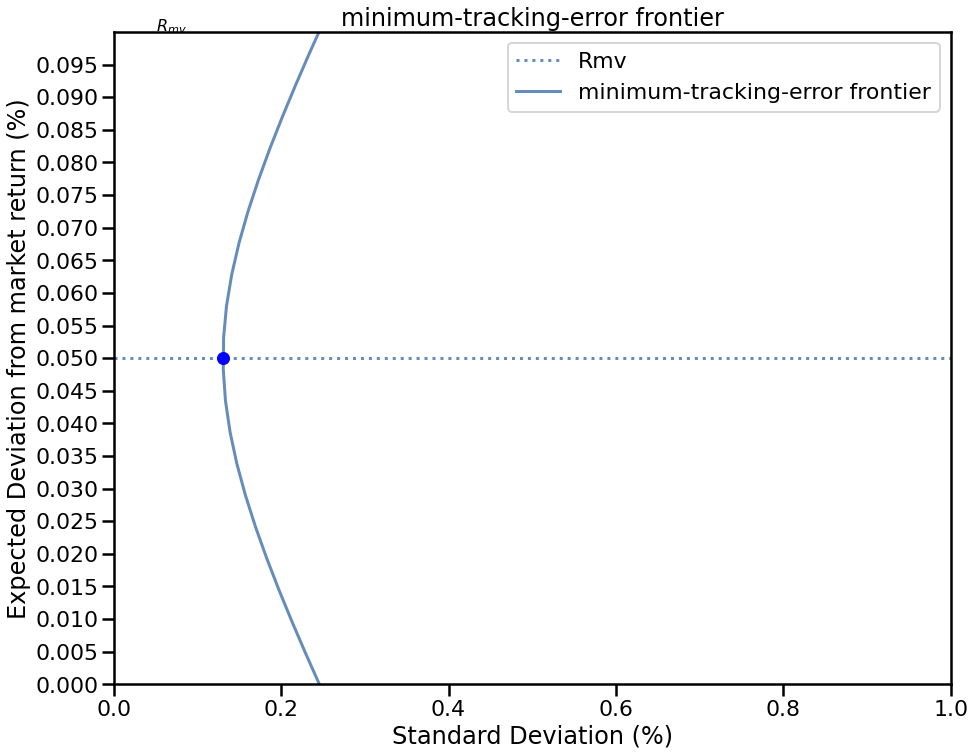

In [28]:
# n x 1 vector of 1
e = np.ones((len(R),1))
# Variable for Efficient frontier
delta = e.T*pinv(V)*e # eV-1e
alpha = R.T*pinv(V)*e # R'V-1e
zeta = R.T*pinv(V)*R # R'V-1R
D = zeta*delta-alpha**2 # denominator
# Return evenly spaced values within a given interval
mu = np.arange(-max(R),max(R)*5,max(R)/100); 

# Plot Efficient Frontier
minvar = ((delta*mu**2)-2*alpha*mu+zeta)/D; # Calculate variance of return for frontier portfolio
minstd = np.sqrt(minvar)[0]; # min. std deviation
minstd = np.squeeze(np.asarray(minstd)) 
# Mean and Variance of Minimum Variance Portfolio
# Mean and Variance of Minimum Variance Portfolio
mu_g = alpha/delta
var_g = 1/delta
std_g = np.sqrt(var_g)

# Minimum Variance Portfolio Weights
w_g = (pinv(V)*e)/delta
 

# Seaborn aesthetics settings
sns.set_context("poster")
plt.figure(figsize=(15,12))
# Axis settings
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,0.1])
ax = plt.axes()



# Plot minimum frontier portfolio 
ax.axhline(mu_g, color='xkcd:faded blue', linestyle=':')
plt.plot(minstd,mu,'xkcd:faded blue',std_g,mu_g,'bo') 
plt.title('minimum-tracking-error frontier')
plt.yticks(np.arange(0, 0.1, 0.005))
plt.ylabel('Expected Deviation from market return (%)')
plt.xlabel('Standard Deviation (%)')
plt.text(0.05,0.05+mu_g,r'$R_{mv}$',fontsize=16);


# Putting arrow & Legend
axes.legend(['Rmv','minimum-tracking-error frontier'])

#### Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier, and calculate the information ratio and portfolio weights for the "tangency" portfolio.

<ipython-input-43-2fb0abe7aa72>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


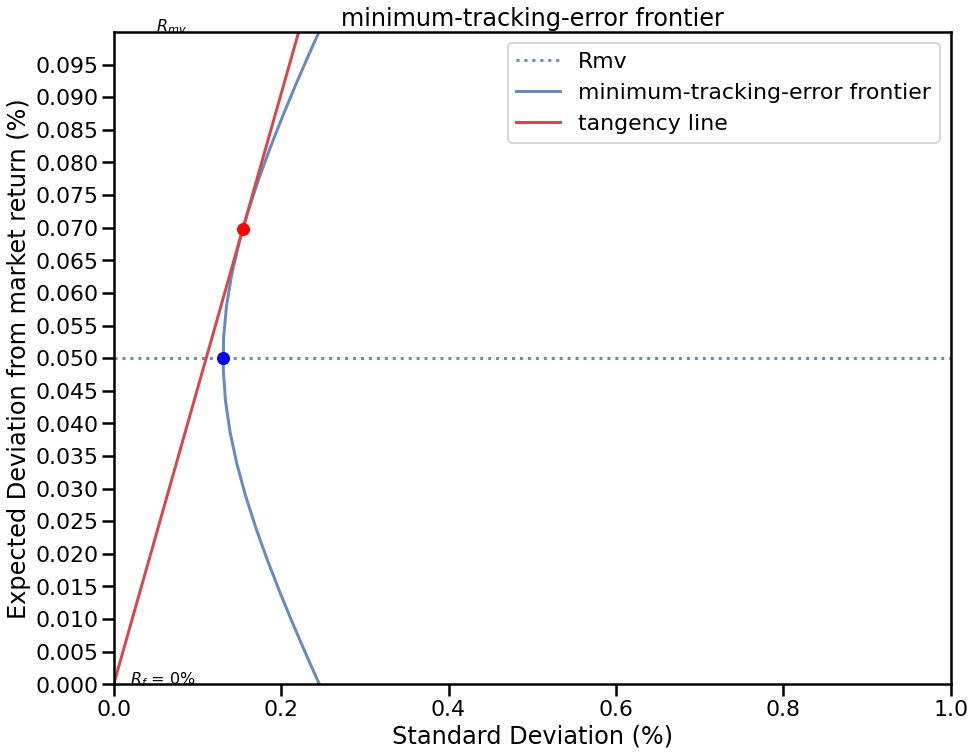

In [43]:
#Plot the efficient frontier (with the riskless asset) on the same plot as the minimum-variance frontier
rf = 0 # risk-free rate
# Expected Return of Tangency Portfolio/ Risk Premium for tangency portfolio
mu_tan = (alpha*rf-zeta)/(delta*rf-alpha);
 
# Variance and Standard Deviation of Tangency Portfolio
vartan = (zeta-2*rf*alpha + (rf**2*delta))/((alpha-delta*rf)**2);
stdtan = np.sqrt(vartan);

# Weights for Tangency Portfolio
w_tan = (pinv(V)*(R - rf*e))/(alpha-delta*rf) 

# Tangency Line
m_tan = mu[mu >= rf]; 
minvar_rf = (m_tan-rf)**2/(zeta-2*rf*alpha+delta*rf**2);
minstd_rf = np.sqrt(minvar_rf);
minstd_rf = np.squeeze(np.asarray(minstd_rf))




# Seaborn aesthetics settings
sns.set_context("poster")
plt.figure(figsize=(15,12))
# Axis settings
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,0.1])
ax = plt.axes()

ax.axhline(mu_g, color='xkcd:faded blue', linestyle=':')
plt.plot(minstd,mu,'xkcd:faded blue',minstd_rf,m_tan,'xkcd:faded red',std_g,mu_g,'bo',stdtan,mu_tan,'ro') 
plt.title('minimum-tracking-error frontier')
plt.yticks(np.arange(0, 0.1, 0.005))
plt.ylabel('Expected Deviation from market return (%)')
plt.xlabel('Standard Deviation (%)')
plt.text(0.05,0.05+mu_g,r'$R_{mv}$',fontsize=16);
plt.text(0.02,rf,r'$R_{f}$' ' = 0%',fontsize=16);


# Putting arrow & Legend

axes.legend(['Rmv','minimum-tracking-error frontier', 'tangency line'])
plt.show()

In [44]:
w_tan = w_tan.T*100
opt_weights = pd.DataFrame(w_tan,columns=Return.columns,index=["Weights (%)"])

display(opt_weights)

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Weights (%),5.263419,0.015343,13.762671,8.703224,17.935289,7.107397,10.688447,10.277595,4.016221,22.230394


In [46]:
Information_Ratio=mu_tan/stdtan
Information_Ratio

matrix([[0.45248754]])

#### Part 2: Hansen–Jagannathan Bound

Suppose that consumption growth has a lognormal distribution with the possibility of rare disasters:

lng=0.02+0.02ϵ+ν
Here 𝜺 is a standard normal random variable, while 𝝂 is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%). Simulate 𝜺 with 104 random draws from a standard normal distribution, and simulate 𝝂 with 104 random draws from a standard uniform distribution. 

Use the simulated distribution of consumption growth to calculate the pricing kernel for power utility:

M=0.99g−γ
for 𝛾 in the range [1,4], in increments of 0.1 (or less). Calculate the mean and standard deviation of the pricing kernel for each values of 𝛾, and plot the ratio SD(M)/E(M) (on the vertical axis) vs 𝛾 (on the horizontal axis). Take note of the smallest value of 𝛾 for which SD(M)/E(M) > 0.4 (i.e., for which the Hansen–Jagannathan bound is satisfied). Briefly explain the economic significance of this result.

In [ ]:
import statsmodels.api as sm
import scipy.optimize as optimize

In [47]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.facecolor'] = '1.'

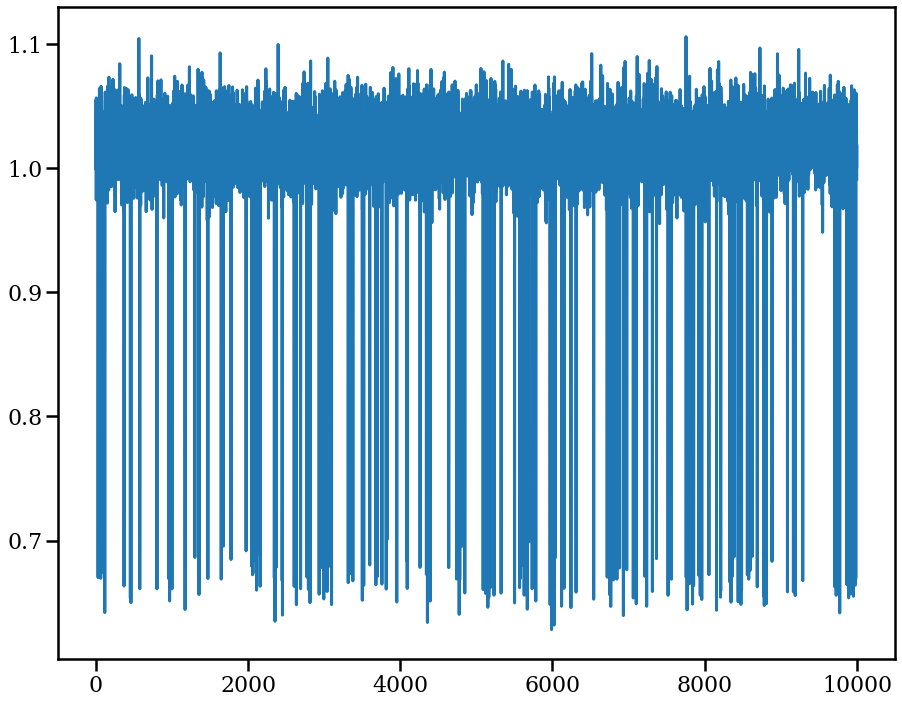

In [49]:
np.random.seed(1)

# Generate nu from a noraml distribution
epsilon = np.random.randn(10000, 1)


nu = np.random.rand(10000, 1)

ind = nu < 0.983
nu[ind] = 0

ind = nu >= 0.983
nu[ind] = np.log(0.65) 


# simulate lng
lng = 0.02 + 0.02*epsilon + nu
g = np.exp(lng)
plt.figure(figsize=(15,12))
plt.plot(g)
plt.show()

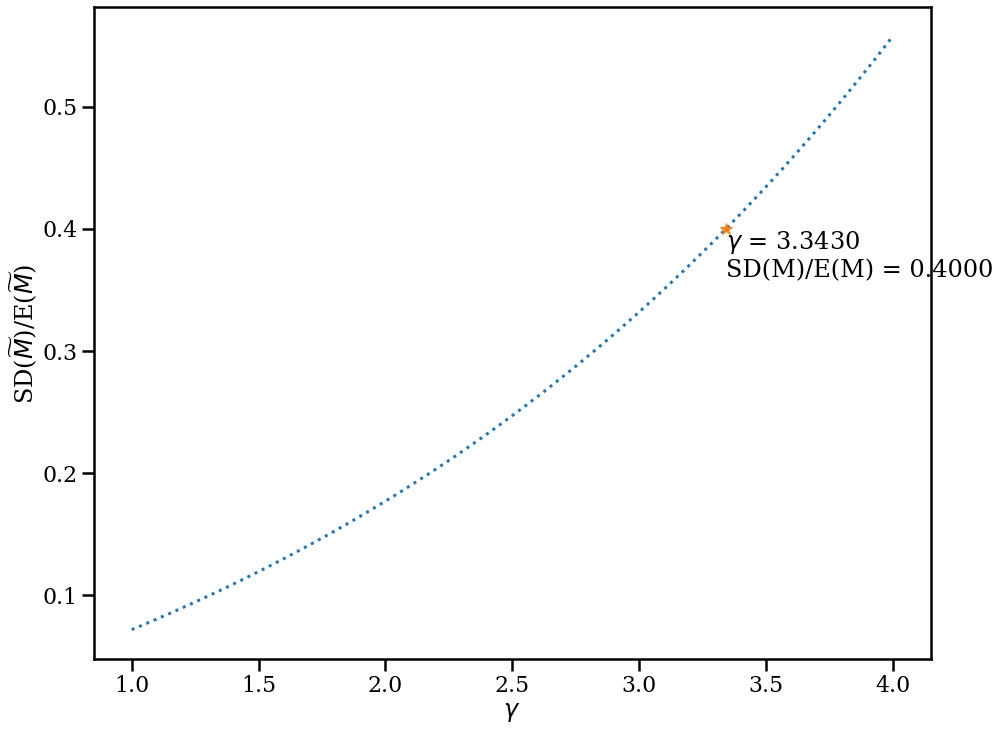

In [51]:

gamma = np.arange(1, 4, 0.001)

M = 0.99 * g**(-gamma)

hj_b= (M.std(axis = 0)/M.mean(axis = 0) ).reshape(gamma.shape)

ind = np.where(hj_b == hj_b[hj_b > 0.4][0] )
plt.figure(figsize=(15,12))
plt.plot(gamma, hj_b,':')
plt.plot(gamma[ind], hj_b[ind], '*')
plt.text(gamma[ind], hj_b[ind], 
         '$\gamma$ = %.4f \nSD(M)/E(M) = %.4f'%( gamma[ind], hj_b[ind]),
        verticalalignment='top')
plt.xlabel('$\gamma$')
plt.ylabel('SD($\\widetilde{M}$)/E($\\widetilde{M}$)')
plt.show()

>The ratio of the standard deviation of a stochastic discount factor ($\tilde{M}$) to its mean exceeds the Sharpe Ratio attained by anyportfolio.

>The higher the $\gamma$ is, the more the investor risk averse, the lower variance they require for the same asset return.

>For those who have a risk averse level of 3.3430, the sharpe ratio requiremnet for they investment is 0.4

>Is the lower bound of volatility pricing kernel, the sharpe ratio for portfolio that has a highest sharpe ratio.